In [1]:
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import sys
sys.path.append("..")
%cd ..

/Users/AsgerSturisTang/OneDrive - Danmarks Tekniske Universitet/DTU/6. Semester/Bachelor2021


In [42]:
import fbprophet
from pathlib import Path
from DataPrep.ImportData import importer
from fbprophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import r2_score

In [15]:
df = importer().Import()

In [17]:
df = df.drop(columns = ["Charging Time (mins)", "Total Duration (mins)","Port Number"])

In [22]:
df.columns = ['ds', 'Label', 'y', 'CenterLon', 'CenterLat',
       'Level 1', 'Level 2', '# Professional & Other Places', '# Food',
       '# Shop & Service', '# Travel & Transport', '# Outdoors & Recreation',
       '# Arts & Entertainment', '# Nightlife Spot', '# Residence',
       '# College & University', '# Event', 'Cluster_0.0', 'Cluster_1.0',
       'Cluster_2.0', 'Cluster_3.0', 'Cluster_4.0', 'Cluster_5.0',
       'Cluster_6.0', 'Cluster_7.0', 'Month_Day_1', 'Month_Day_2',
       'Month_Day_3', 'Month_Day_4', 'Month_Day_5', 'Month_Day_6',
       'Month_Day_7', 'Month_Day_8', 'Month_Day_9', 'Month_Day_10',
       'Month_Day_11', 'Month_Day_12', 'Month_Day_13', 'Month_Day_14',
       'Month_Day_15', 'Month_Day_16', 'Month_Day_17', 'Month_Day_18',
       'Month_Day_19', 'Month_Day_20', 'Month_Day_21', 'Month_Day_22',
       'Month_Day_23', 'Month_Day_24', 'Month_Day_25', 'Month_Day_26',
       'Month_Day_27', 'Month_Day_28', 'Month_Day_29', 'Month_Day_30',
       'Month_Day_31', 'Week_Day_0', 'Week_Day_1', 'Week_Day_2', 'Week_Day_3',
       'Week_Day_4', 'Week_Day_5', 'Week_Day_6', 'Year_Month_1',
       'Year_Month_2', 'Year_Month_3', 'Year_Month_4', 'Year_Month_5',
       'Year_Month_6', 'Year_Month_7', 'Year_Month_8', 'Year_Month_9',
       'Year_Month_10', 'Year_Month_11', 'Year_Month_12', 'is_holiday',
       'is_weekend']

In [82]:
m = fbprophet.Prophet()
m.fit(df[(df.ds.dt.year < 2018) & df.Label == 1.0])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [83]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2653,2018-12-27,2.919576,1.780834,3.992486
2654,2018-12-28,2.903149,1.835487,4.067654
2655,2018-12-29,2.923110,1.835037,4.009471
2656,2018-12-30,2.949460,1.879154,4.083332
2657,2018-12-31,2.971513,1.785749,4.056902


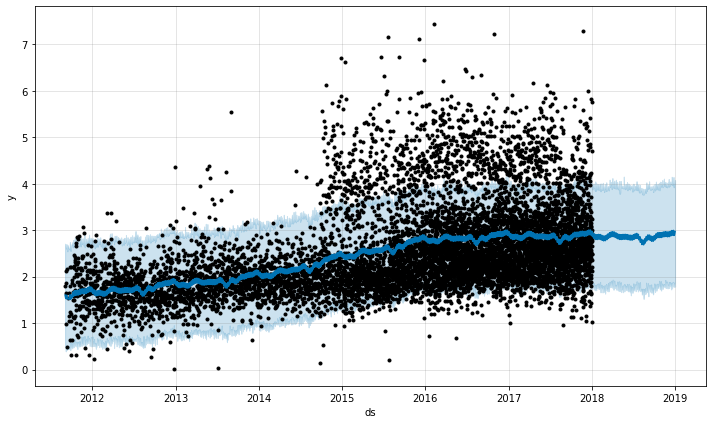

In [84]:
fig1 = m.plot(forecast)

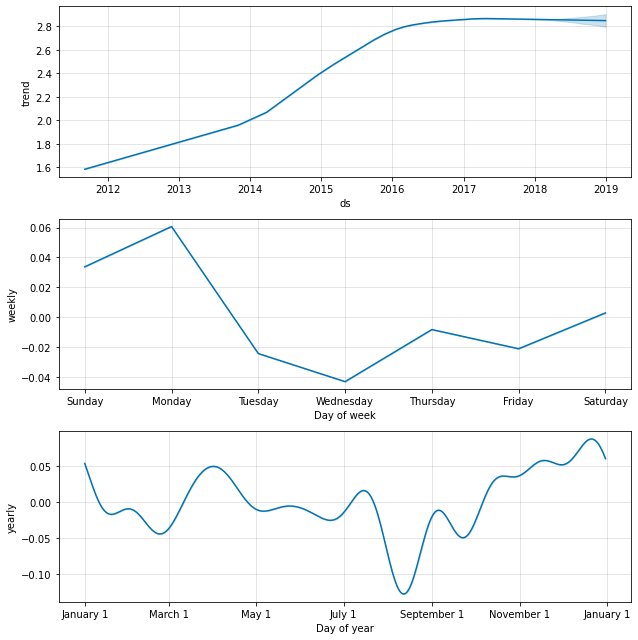

In [85]:
fig2 = m.plot_components(forecast)

In [78]:
r2_score(df.y[(df.ds.dt.year == 2019) & (df.Label == 0.0)],forecast.yhat[forecast.ds.dt.year == 2019])

-1.8671258124473575

<IPython.core.display.Javascript object>

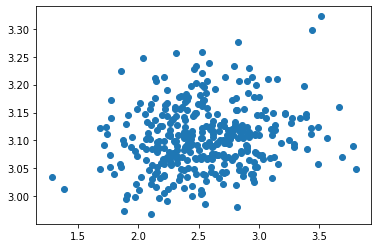

In [81]:
plt.scatter(df.y[(df.ds.dt.year == 2019) & (df.Label == 0.0)],forecast.yhat[forecast.ds.dt.year == 2019])